In [40]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [41]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,max_sep,max_oct,max_nov,max_dec,rushing_rush_td_pg_cf_scaled_zscore,rushing_rush_yds_pg_cf_scaled_zscore,rushing_scrim_plays_pg_cf_scaled_zscore,rushing_scrim_tds_pg_cf_scaled_zscore,rushing_scrim_yds_pg_cf_scaled_zscore,max_madden
0,113,3886636.0,106,1993,Alex Barnes,Alex,Barnes,RB,RB,O,...,81.8,69.7,55.4,42.5,0.015832,0.060967,-0.235308,-0.192098,-0.154469,63.0
1,136,4048244.0,25,323,Alexander Mattison,Alexander,Mattison,RB,RB,O,...,78.8,64.8,48.2,37.5,0.325576,-0.114217,0.172358,0.176027,-0.099267,68.0
2,414,NaN,109,1835,Benny Snell,Benny,Snell,RB,RB,O,...,78.8,67.5,55.4,43.9,2.221059,1.638262,1.592191,1.920923,1.293443,69.0
3,645,3931398.0,218,3148,Bryce Love,Bryce,Love,RB,RB,O,...,79.5,74.0,64.8,58.3,-0.182624,0.389789,-0.322855,-0.257789,0.272394,71.0
4,1182,3925347.0,3,3310,Damien Harris,Damien,Harris,RB,RB,O,...,87.7,77.7,67.7,58.2,-0.624975,-0.233521,-0.682006,-0.680620,-0.338316,69.0


In [42]:

dataset['football_spending']=dataset['coaches_salaries']=dataset['ticket_sales']=np.nan
dataset['poverty_pct']=dataset['med_income']=dataset['ann_rain_inch']=dataset['ann_snow_inch']=dataset['min_jan']=dataset['min_feb']=dataset['min_mar']=dataset['min_apr']=dataset['min_may']=dataset['min_jun']=dataset['min_jul']=dataset['min_aug']=dataset['min_sep']=dataset['min_oct']=dataset['min_nov']=dataset['min_dec']=dataset['max_jan']=dataset['max_feb']=dataset['max_mar']=dataset['max_apr']=dataset['max_may']=dataset['max_jun']=dataset['max_jul']=dataset['max_aug']=dataset['max_sep']=dataset['max_oct']=dataset['max_nov']=dataset['max_dec']=np.nan
for i in range(dataset.shape[0]):
  lookup_val = dataset['fms_id'][i]
  college_val = player_dim.loc[player_dim['fms_id'] == lookup_val]['fms_college_id'].values[0]
  dataset.at[i,'football_spending'] = college_df.loc[college_df['fms_college_id'] == college_val]['football_spending'].values[0]
  dataset.at[i,'coaches_salaries'] = college_df.loc[college_df['fms_college_id'] == college_val]['coaches_salaries'].values[0]
  dataset.at[i,'ticket_sales'] = college_df.loc[college_df['fms_college_id'] == college_val]['ticket_sales'].values[0]
  city_val = college_dim.loc[college_dim['fms_college_id'] == college_val]['fms_city_id'].values[0]
  dataset.at[i,'poverty_pct'] = city_df.loc[city_df['fms_city_id'] == city_val]['poverty_pct'].values[0]
  tmp = city_df.loc[city_df['fms_city_id'] == city_val]['med_income'].values[0]
  if type(tmp) == str:
    tmp = tmp.replace('$','').replace(',','')
  dataset.at[i,'med_income'] = tmp
  dataset.at[i,'ann_rain_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_rain_inch'].values[0]
  dataset.at[i,'ann_snow_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_snow_inch'].values[0]
  dataset.at[i,'min_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jan'].values[0]
  dataset.at[i,'min_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_feb'].values[0]
  dataset.at[i,'min_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_mar'].values[0]
  dataset.at[i,'min_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_apr'].values[0]
  dataset.at[i,'min_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_may'].values[0]
  dataset.at[i,'min_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jun'].values[0]
  dataset.at[i,'min_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jul'].values[0]
  dataset.at[i,'min_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_aug'].values[0]
  dataset.at[i,'min_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_sep'].values[0]
  dataset.at[i,'min_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_oct'].values[0]
  dataset.at[i,'min_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_nov'].values[0]
  dataset.at[i,'min_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_dec'].values[0]
  dataset.at[i,'max_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jan'].values[0]
  dataset.at[i,'max_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_feb'].values[0]
  dataset.at[i,'max_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_mar'].values[0]
  dataset.at[i,'max_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_apr'].values[0]
  dataset.at[i,'max_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_may'].values[0]
  dataset.at[i,'max_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jun'].values[0]
  dataset.at[i,'max_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jul'].values[0]
  dataset.at[i,'max_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_aug'].values[0]
  dataset.at[i,'max_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_sep'].values[0]
  dataset.at[i,'max_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_oct'].values[0]
  dataset.at[i,'max_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_nov'].values[0]
  dataset.at[i,'max_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_dec'].values[0]

In [43]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'conference', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'forty_zscore', 'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore', 'shuttle_zscore', 'max_madden_zscore', 'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore', 'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore', 'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore', 'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore', 'rushing_scrim_yds_pg_zscore', 'football_spending_zscore', 'coaches_salaries_zscore', 'ticket_sales_zscore', 'rushing_rush_td_pg_cf_scaled_zscore', 'rushing_rush_yds_pg_cf_scaled_zscore', 'rushing_scrim_plays_pg_cf_scaled_zscore', 'rushing_scrim_tds_pg_cf_scaled_zscore', 'rushing_scrim_yds_pg_cf_scaled_zscore', 'max_madden', 'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct', 'med_i

In [44]:
#Deal with None Values
none_dict = {'espn_id': 0, 
    'conference':  'non_power_five',
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'football_spending': dataset['shuttle'].mean(), 
    'coaches_salaries': dataset['shuttle'].mean(), 
    'ticket_sales': dataset['shuttle'].mean(), 
    'poverty_pct': dataset['shuttle'].mean(), 
    'med_income': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'forty_zscore': dataset['forty_zscore'].mean(), 
    'vertical_zscore': dataset['vertical_zscore'].mean(), 
    'bench_zscore': dataset['bench_zscore'].mean(), 
    'broad_zscore': dataset['broad_zscore'].mean(), 
    'threecone_zscore': dataset['threecone_zscore'].mean(), 
    'shuttle_zscore': dataset['shuttle_zscore'].mean(), 
    
    'max_madden_zscore': dataset['max_madden_zscore'].min() - 0.1,
    'rushing_rec_td_pg_zscore': dataset['rushing_rec_td_pg_zscore'].min(), 
    'rushing_rec_yards_pg_zscore': dataset['rushing_rec_yards_pg_zscore'].min(), 
    'rushing_receptions_pg_zscore': dataset['rushing_receptions_pg_zscore'].min(), 
    'rushing_rush_att_pg_zscore': dataset['rushing_rush_att_pg_zscore'].min(), 
    'rushing_rush_td_pg_zscore': dataset['rushing_rush_td_pg_zscore'].min(), 
    'rushing_rush_yds_pg_zscore': dataset['rushing_rush_yds_pg_zscore'].min(), 
    'rushing_scrim_plays_pg_zscore': dataset['rushing_scrim_plays_pg_zscore'].min(), 
    'rushing_scrim_tds_pg_zscore': dataset['rushing_scrim_tds_pg_zscore'].min(), 
    'rushing_scrim_yds_pg_zscore': dataset['rushing_scrim_yds_pg_zscore'].min(),
    'rushing_rush_td_pg_cf_scaled_zscore': dataset['rushing_rush_td_pg_cf_scaled_zscore'].min(), 
    'rushing_rush_yds_pg_cf_scaled_zscore': dataset['rushing_rush_yds_pg_cf_scaled_zscore'].min(), 
    'rushing_scrim_plays_pg_cf_scaled_zscore': dataset['rushing_scrim_plays_pg_cf_scaled_zscore'].min(), 
    'rushing_scrim_tds_pg_cf_scaled_zscore': dataset['rushing_scrim_tds_pg_cf_scaled_zscore'].min(),
    'rushing_scrim_yds_pg_cf_scaled_zscore': dataset['rushing_scrim_yds_pg_cf_scaled_zscore'].min(),
             
    'football_spending_zscore': dataset['football_spending_zscore'].min(), 
    'coaches_salaries_zscore':  dataset['coaches_salaries_zscore'].min(), 
    'ticket_sales_zscore':  dataset['ticket_sales_zscore'].min()}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'conference': 'non_power_five', 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555525291828793, 'vertical': 34.36480186480186, 'bench': 19.435323383084576, 'broad': 118.0190023752969, 'threecone': 7.062059800664453, 'shuttle': 4.263355263157894, 'football_spending': 4.263355263157894, 'coaches_salaries': 4.263355263157894, 'ticket_sales': 4.263355263157894, 'poverty_pct': 4.263355263157894, 'med_income': 4.263355263157894, 'max_madden': 47.0, 'forty_zscore': -3.8910716412875066e-12, 'vertical_zscore': -2.0978997870681357e-11, 'bench_zscore': -4.975160140137953e-12, 'broad_zscore': -1.211401609797449e-10, 'threecone_zscore': 4.3189372344268514e-11, 'shuttle_zscore': 2.3026317694679594e-11, 'max_madden_zscore': -2.1062581330000003, 'rushing_rec_td_pg_zscore': -0.9661947129999999, 'rushing_rec_yards_pg_zscore': -1.5

In [45]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)







def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)





In [46]:

#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)
if current_no_madden_percentage > 0:
    remove_num = int(current_no_madden_percentage * dataset.shape[0])
    random_no_madden = np.random.choice(no_madden_df.index, remove_num)
    no_madden_df = no_madden_df.drop(random_no_madden)

print(no_madden_df.shape[0] / (no_madden_df.shape[0] + madden_df.shape[0]))
dataset = madden_df.append(no_madden_df)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(207, 114)
(320, 114)
0.14278937381404172
0.30885529157667385


,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,rushing_scrim_yds_pg_cf_scaled_zscore,max_madden,football_spending,coaches_salaries,ticket_sales,poverty_pct,med_income,madden_cat,avg_min,avg_max
264,2505,0.0,256,1911,Joe McKnight,Joe,McKnight,RB,RB,O,...,-0.157378,73.0,4.263355e+00,4.263355e+00,4.263355e+00,14.200000,67986.0,70,55.666667,75.158333
388,1845,0.0,126,2116,Frank Gore,Frank,Gore,RB,RB,O,...,-0.083195,93.0,5.586041e+06,1.145257e+06,1.084365e+06,16.000000,52043.0,90,70.008333,84.291667
414,3545,0.0,248,2326,Mewelde Moore,Mewelde,Moore,RB,RB,O,...,1.186074,74.0,4.263355e+00,4.263355e+00,4.263355e+00,23.799999,38855.0,70,55.866667,75.433333
21,3918,3123944.0,185,2634,Qadree Ollison,Qadree,Ollison,RB,RB,O,...,-0.539533,64.0,4.263355e+00,4.263355e+00,4.263355e+00,11.700000,59881.0,60,42.541667,61.433333
456,1419,0.0,253,1911,DeShaun Foster,DeShaun,Foster,RB,RB,O,...,0.448003,47.0,1.624688e+07,2.470121e+06,1.807878e+07,14.200000,67986.0,40,55.666667,75.158333


In [47]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore',
       'rushing_scrim_yds_pg_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore', 'max_madden',
       'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct',
       'med_income', 'ann_rain_inch', 'ann_snow_inch', 'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec', 'avg_min',
       'avg_max', 'madden_cat']"""





# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore',
       'ann_rain_inch',
       'ann_snow_inch', 'min_jan', 'min_feb', 'min_mar', 'min_apr', 'min_may',
       'min_jun', 'min_jul', 'min_aug', 'min_sep', 'min_oct', 'min_nov',
       'min_dec', 'max_jan', 'max_feb', 'max_mar', 'max_apr', 'max_may',
       'max_jun', 'max_jul', 'max_aug', 'max_sep', 'max_oct', 'max_nov',
       'max_dec', 'rushing_rush_td_pg_cf_scaled_zscore',
       'rushing_rush_yds_pg_cf_scaled_zscore',
       'rushing_scrim_plays_pg_cf_scaled_zscore',
       'rushing_scrim_tds_pg_cf_scaled_zscore',
       'rushing_scrim_yds_pg_cf_scaled_zscore']

In [48]:
#Create by game by conference per game stats
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use by game stats?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

In [49]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = features



#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

for col in dataset[features_list].columns:
    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
prediction_feature = 'max_madden'

#prediction_feature = 'madden_cat'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [50]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

In [51]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = list(set(dataset[prediction_feature].values))

In [52]:
result_df = test_df[['full_name', prediction_feature, 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    
    return df

               full_name  max_madden  position_group_rank
116       Jahwan Edwards        66.0                 26.0
128           Mike Davis        77.0                 11.0
126        Melvin Gordon        87.0                  2.0
127         Michael Dyer        65.0                 28.0
134        Trey Williams        67.0                 31.0
117       Javorius Allen        74.0                 10.0
111  Cameron Artis-Payne        70.0                 16.0
129          T.J. Yeldon        80.0                  3.0
125           Matt Jones        77.0                  7.0
122       Kenny Hilliard        62.0                 20.0
119      Jeremy Langford        76.0                  8.0
110        Braylon Heard        47.0                 23.0
118            Jay Ajayi        87.0                 13.0
133          Todd Gurley        80.0                  1.0
113             Dee Hart        47.0                 24.0
123        Malcolm Brown        72.0                 27.0
130       Terr

Accuracy:  0.11538461538461539
R2 : -0.6302168403266684
MSE : 171.26923076923077
AdaBoostRegressor model picked 45 out of 45 features
Index(['AdaBoost'], dtype='object')




























,full_name,AdaBoost,max_madden,position_group_rank
115,Duke Johnson,85.0,83.0,6.0
133,Todd Gurley,81.0,80.0,1.0
131,Tevin Coleman,79.0,86.0,5.0
108,Ameer Abdullah,78.0,82.0,4.0
111,Cameron Artis-Payne,77.0,70.0,16.0
129,T.J. Yeldon,77.0,80.0,3.0
128,Mike Davis,76.0,77.0,11.0
117,Javorius Allen,75.0,74.0,10.0
118,Jay Ajayi,73.0,87.0,13.0
126,Melvin Gordon,70.0,87.0,2.0


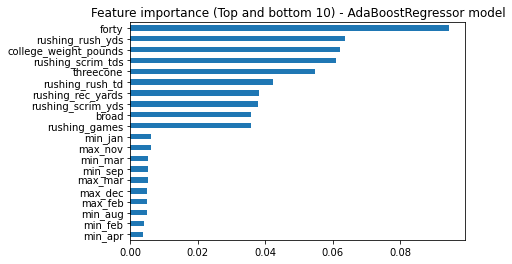

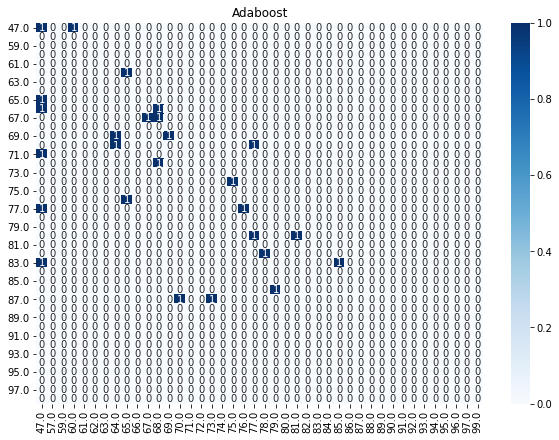

In [55]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)

print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)

plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df



In [ ]:
ordered_df.to_csv('rank_of_picks.csv')